In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [6]:
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,888,771 (91.13 MB)

 Trainable params: 301,059 (1.15 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets\Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets\Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Epoch 1/50


c:\Users\RAMESH\anaconda3\envs\Cbc\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 9s/step - accuracy: 0.3542 - loss: 3.2286 - val_accuracy: 0.3276 - val_loss: 15.9400
Epoch 2/50


c:\Users\RAMESH\anaconda3\envs\Cbc\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 7s/step - accuracy: 0.3854 - loss: 9.9996 - val_accuracy: 0.1552 - val_loss: 13.3053
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 6s/step - accuracy: 0.3438 - loss: 8.4121 - val_accuracy: 0.5345 - val_loss: 1.8324
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 7s/step - accuracy: 0.4479 - loss: 3.1176 - val_accuracy: 0.5345 - val_loss: 2.8080
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 7s/step - accuracy: 0.5000 - loss: 

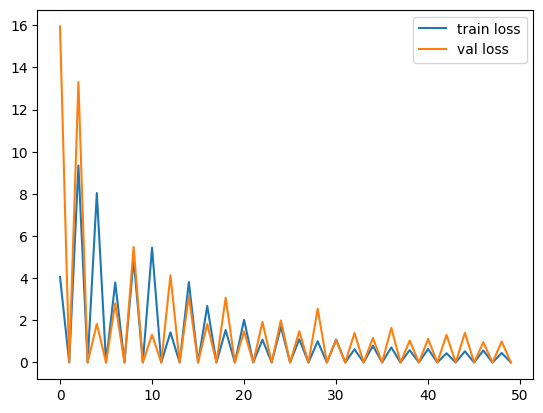

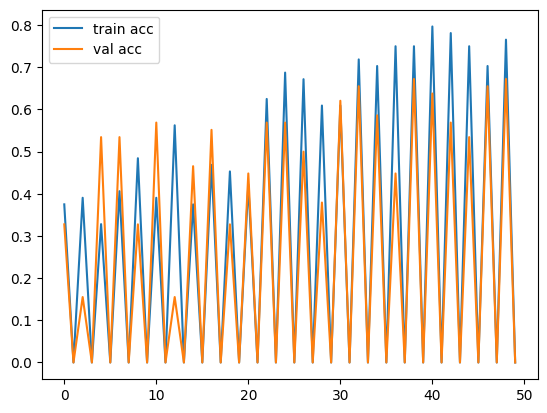

<Figure size 640x480 with 0 Axes>

In [15]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [17]:

y_pred = model.predict(test_set)


2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step


In [18]:
y_pred

array([[3.65874656e-02, 5.62489629e-01, 4.00922894e-01],
       [2.34606676e-02, 2.59000570e-01, 7.17538774e-01],
       [1.97676476e-03, 6.48353100e-02, 9.33187902e-01],
       [7.54244393e-03, 7.34740317e-01, 2.57717222e-01],
       [1.54946342e-01, 4.12075013e-01, 4.32978749e-01],
       [1.19310031e-02, 7.43217826e-01, 2.44851172e-01],
       [5.88710209e-05, 9.83723402e-01, 1.62177347e-02],
       [2.35863198e-02, 5.82681550e-03, 9.70586896e-01],
       [9.01216583e-04, 8.56292188e-01, 1.42806664e-01],
       [3.46572604e-04, 9.69683826e-01, 2.99695544e-02],
       [5.72381876e-02, 3.34753186e-01, 6.08008683e-01],
       [1.20844277e-06, 3.60471429e-04, 9.99638319e-01],
       [4.44425689e-03, 9.38217759e-01, 5.73379099e-02],
       [3.87870781e-02, 9.47033763e-01, 1.41791338e-02],
       [1.37296796e-03, 9.97686028e-01, 9.41030856e-04],
       [6.29800884e-03, 2.94004567e-04, 9.93407965e-01],
       [8.19318369e-03, 9.49091852e-01, 4.27149571e-02],
       [4.40327777e-03, 2.18518

In [19]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [20]:
y_pred

array([1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 2, 1, 1,
       1, 0, 2, 2, 2, 1, 2, 2, 1, 1, 1, 0, 1, 2], dtype=int64)

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [22]:
model=load_model('model_resnet50.h5')

In [26]:
img_data = load_image_data()  # Assuming load_image_data() is a function that loads image data


In [25]:
def load_image_data():
    # Your code to load image data goes here
    pass


In [27]:
img_data

In [28]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

In [29]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [194., 188., 174.],
        [215., 209., 197.],
        [241., 235., 223.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [247., 245., 233.],
        [245., 242., 233.],
        [244., 241., 232.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 248., 241.],
        [244., 250., 248.],
        [244., 250., 248.]],

       ...,

       [[190., 206., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[187., 205., 227.],
        [187., 205., 227.],
        [187., 205., 227.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [187., 2

In [30]:
x.shape

(224, 224, 3)

In [31]:
x=x/255

In [32]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [33]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([[3.0781674e-05, 2.4953043e-02, 9.7501618e-01]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


In [ ]:
a==1

array([False])